# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
import pickle

from dqn_agent import Agent
from collections import namedtuple, deque

import torch
import torchvision 

#Defining parameters for better plots
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5],
          'axes.labelsize': 15,
          'axes.titlesize':18,
          'font.size': 15,
          'legend.fontsize': 15,
          'xtick.labelsize': 13,
          'ytick.labelsize': 13
         }
plt.rcParams.update(params)

if torch.cuda.is_available():
    print("Using GPU")
else:
    print("Using CPU")


Using GPU


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
    
    
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

# env_info = env.reset(train_mode=True)[brain_name]


Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
agent = Agent(state_size, action_size, seed=0)

## Training the Agent


In [7]:
eps_start = 1.0
eps_end = 0.01
eps_decay=0.995
n_episodes = 900
t_max = 300                        #  a limitation of the environment
SCORE_STOP_CONDITION = 13
WINDOW_SIZE = 100
def agent_learning(env, agent, score_stop_condition):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=WINDOW_SIZE)  # last 100 scores

    eps = eps_start                    # initialize epsilon
    for i_episode in range(1,n_episodes+1):
        # action = np.random.randint(action_size)          # select an action
        score = 0                                          # initialize the score
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]            # get the current state
        # reset environment
        for t in range(t_max):
            action = agent.act(state).astype(int)          # select an action
            # print(f"action selection:{action}")
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = int(env_info.rewards[0])              # get the reward
            # if reward != 0.0:
                # print(reward, flush = True)
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)

            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break

        scores_window.append(score)
        scores.append(score)                              # save most recent score
        eps = max(eps_end, eps_decay*eps)                 # decrease epsilon

        # print('\rEpisode {}\tAverage Score: {:.1f}'.format(i_episode, np.mean(scores_window)), end="", flush=True)
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>score_stop_condition:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            print(f"Last scores batch:\n{scores_window}")
            break

        elif(i_episode == n_episodes):
            print('\Episodes horizon exceeded!\tAverage Score: {:.2f}'.format(np.mean(scores_window)))
            print(f"Last scores batch:\n{scores_window}")            

    return scores, agent.qnetwork_local.state_dict()

In [8]:
learning_curve, agent_weights = agent_learning(env, agent, SCORE_STOP_CONDITION)
torch.save(agent_weights, 'checkpoint.pth')

Episode 100	Average Score: 0.74
Episode 200	Average Score: 6.01
Episode 300	Average Score: 7.54
Episode 400	Average Score: 8.74
Episode 500	Average Score: 12.34
Episode 600	Average Score: 12.71
Episode 700	Average Score: 12.60

Environment solved in 665 episodes!	Average Score: 13.03
Last scores batch:
deque([5, 9, 12, 16, 5, 17, 15, 15, 16, 10, 19, 9, 13, 12, 11, 13, 10, 19, 10, 14, 18, 11, 3, 14, 10, 19, 15, 12, 16, 18, 10, 8, 16, 11, 16, 16, 6, 10, 9, 13, 15, 7, 15, 13, 9, 17, 11, 11, 13, 17, 8, 15, 14, 16, 14, 15, 8, 16, 15, 14, 14, 16, 14, 11, 10, 10, 11, 13, 18, 12, 11, 13, 13, 7, 18, 15, 18, 9, 11, 14, 10, 16, 15, 10, 14, 13, 12, 14, 15, 11, 17, 14, 11, 11, 10, 17, 15, 15, 20, 21], maxlen=100)


In [9]:
# algoritmo: rodar learning_process
# retornar de cada learning process o histórico;
# deixar como está esse, mas definir como uma função a parte de learning
# retornar scores

# para cada iteração, dar append do scores
# fazer alguma função para entrar uma lista de listas e sair uma média de listas

#plotar a "lista média"

In [10]:

if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
    print("Using GPU")
else:
    map_location='cpu'
    print("Using CPU")

checkpoint = torch.load('checkpoint.pth', map_location=map_location)
agent.qnetwork_local.load_state_dict(checkpoint)



Using GPU


<All keys matched successfully>

##  Evaluation of the learned policy

In [11]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
i = 0
while True:

    action = agent.act(state).astype(int)          # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished

    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    i+=1
    if done:                                       # exit loop if episode finished
        break
print(f"number of steps until finish the episode: {i}")
print("Score: {}".format(score))

number of steps until finish the episode: 300
Score: 14.0


In [13]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
import pickle

from dqn_agent import Agent
from collections import namedtuple, deque

import torch
import torchvision 

#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5],
          'axes.labelsize': 15,
          'axes.titlesize':18,
          'font.size': 15,
          'legend.fontsize': 15,
          'xtick.labelsize': 13,
          'ytick.labelsize': 13
         }
plt.rcParams.update(params)

if torch.cuda.is_available():
    print("Using GPU")
else:
    print("Using CPU")


Using GPU


In [14]:
# Evaluating the learning Curve:
n_learning_process = 10
learning_data = []

# env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

for i in range(n_learning_process):
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]

    env_info = env.reset(train_mode=True)[brain_name]
    action_size = brain.vector_action_space_size
    state_size = len(env_info.vector_observations[0])

    agent = Agent(state_size, action_size, seed=2*i)
    learning_curve, _ = agent_learning(env, agent, 999)
    learning_data.append(learning_curve)

env.close()

Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.04
Episode 300	Average Score: -0.04
Episode 400	Average Score: -0.03
Episode 500	Average Score: -0.01
Episode 600	Average Score: 0.03
Episode 700	Average Score: -0.03
Episode 800	Average Score: -0.01
\Episodes horizon exceeded!	Average Score: -0.01
Last scores batch:
deque([0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], maxlen=100)
Episode 100	Average Score: 4.27
Episode 200	Average Score: 9.88
Episode 300	Average Score: 12.33

Environment solved in 225 episodes!	Average Score: 13.04
Last scores batch:
deque([9, 7, 20, 15, 16, 13, 11, 17, 13, 6, 12, 8, 12, 14, 16, 5, 17, 12, 15, 9, 14, 17, 13, 14, 13, 10, 17, 12, 0, 10, 7, 14, 8, 15, 12, 18, 18, 11, 11, 16, 10, 14, 1

In [15]:
with open('learning_dynamics.txt', 'wb') as f:
    pickle.dump(learning_data,f)

In [16]:
# É com os dados carregados que devo trabalhar, pra evitar perda de tempo se quebrar o kernel novamente

with open("learning_dynamics.txt", "rb") as f:
    loaded_data = pickle.load(f)


Text(0.5, 1.0, 'Learning curve: Double DQN with a limit of 325 episodes')

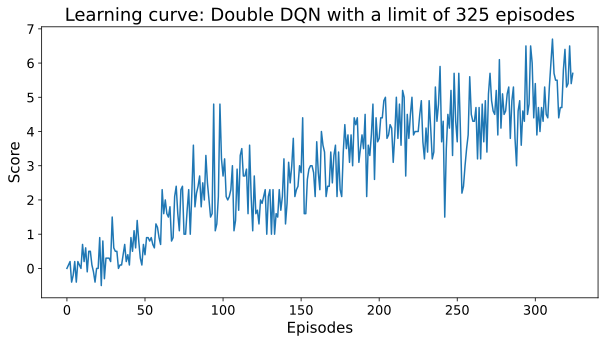

In [27]:
# get the smallest size to make it fit into the plot
smallest_list_len = min([len(data) for data in learning_data])

processed_learning_data = [(learning_data[i][:smallest_list_len]) for i in range(len(learning_data))]
processed_learning_data_array = np.array(processed_learning_data)
# Calculate the average over the n_learning_process curves
output = np.average(processed_learning_data_array, axis=0)


#Plotting the learning curve
plt.plot(output)
plt.xlabel("Episodes")
plt.ylabel("Score")
plt.title(f"Learning curve: Double DQN with a limit of {smallest_list_len} episodes")
# show! montadas as funções